# Minor Assignments

##### Minor Assignment 1/13 

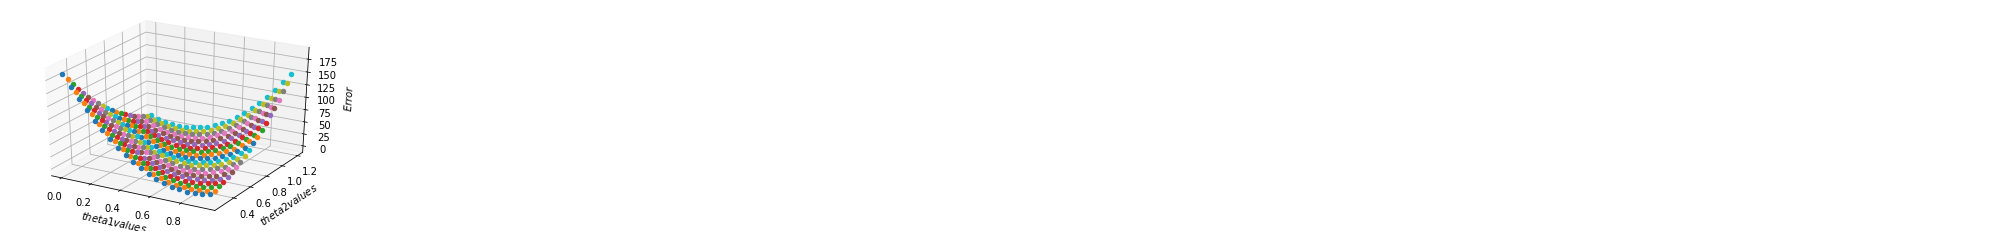

In [393]:
import numpy as np
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.close('all')

X=np.array([[1.0,2.0],[10.0,8.0],[12.0,6.0],[5.0,4.0]])
Y=np.array([0.75,9.75,9.25,4.25])

#best theta list found: [-1.25,0.5,0.75]

#CalculErreur
Erreur = []
def calcul_erreur(theta0,theta1,theta2,liste_Y,liste_X): #function returing the error using least mean square
    erreur=0
    ly=len(liste_Y)
    for i in range(ly):
        y_faux=theta0+theta1*liste_X[i][0]+theta2*liste_X[i][1]
        erreur += (liste_Y[i]-y_faux)**2
    return erreur

theta0=-1.25 #value of theta0 that we do not modify
theta_test1=np.arange(0,1,0.05) #different values of theta1
theta_test2=np.arange(0.25,1.25,0.05) #different values for theta2
l=len(theta_test1)
Liste_erreurs=[[0 for i in range(l)] for i in range(l)]

for i in range(l):
    for j in range(l):
        Liste_erreurs[i][j]=calcul_erreur(theta0,theta_test1[i],theta_test2[j],Y,X) #list of the errors for each pair of theta1 and theta2

plt.close() #in order not to open too many figures and use too much memory
fig = plt.figure() #the 3D version
ax = fig.add_subplot(111, projection='3d')
for i in range(l):
    for j in range(l):
        ax.scatter(theta_test1[i], theta_test2[j], Liste_erreurs[i][j])
ax.set_xlabel('$theta1 values$')
ax.set_ylabel('$theta2 values$')
ax.set_zlabel('$Error$');
fig

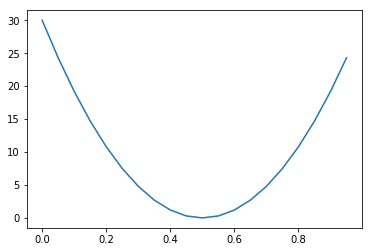

In [394]:
plt.close()
plt.plot(theta_test1,Liste_erreurs[10]) #showing the 2D representation when blocking thetha2 value at 0.75 (the 11th value taken by thetha2 in the theta2 list)
plt.show() #This plot shows the convexity for a given theta2 (here theta2=0.75) 

We can see that the reslut is convex and that there are orientation vectors (vecteurs directeurs) that define pairs of theta1 and theta2 with the same error. We also showed a 2D representation of a cut of the 3D figure

###### Minor Assignment 2/13 

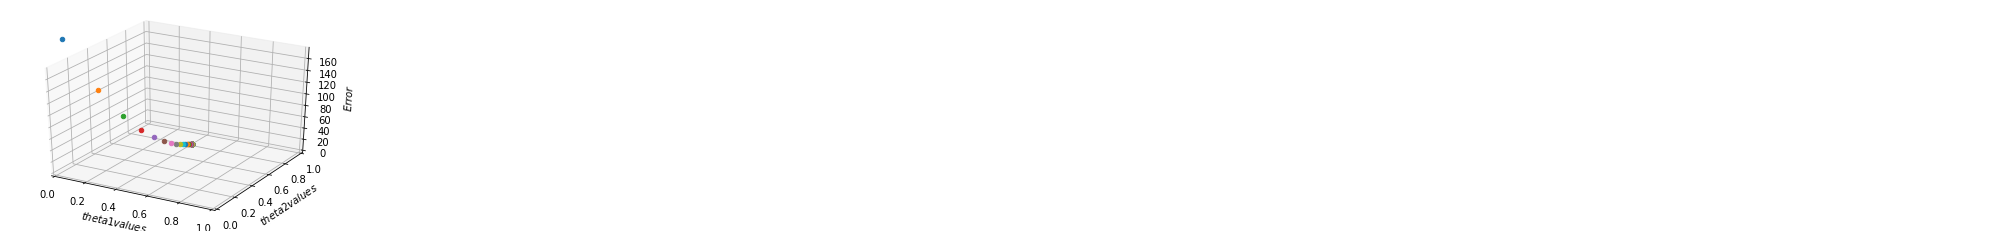

In [395]:
liste_theta1=[0 for i in range(1000)]
liste_theta2=[0 for i in range(1000)]
liste_theta1[0]=0.05 #initialization
liste_theta2[0]=0.05 #initialization
l=len(liste_theta1)
theta0=-1.25 
for i in range(1,l):
    y_faux=theta0+liste_theta1[i-1]*X[0][0]+liste_theta2[i-1]*X[0][1] #false y value (test value)
    liste_theta1[i]=liste_theta1[i-1]-0.05*(y_faux-Y[0])*X[0][0] #gradient descent
    liste_theta2[i]=liste_theta2[i-1]-0.05*(y_faux-Y[0])*X[0][1] #gradient descent
    
Liste_erreurs2=[0 for i in range(l)]

for i in range(l):
   Liste_erreurs2[i]=calcul_erreur(theta0,liste_theta1[i],liste_theta2[i],Y,X) #still calculating the error with least mean square
plt.close('all')
fig2 = plt.figure()
axx = fig2.add_subplot(111, projection='3d')
#normalizing the scale to make it the same as for the minor assignment 1
axes=fig2.gca()
axes.set_xlim(0, 1) 
axes.set_ylim(0, 1)
axes.set_zlim(0, 175)
for i in range(l):
    axx.scatter(liste_theta1[i],liste_theta2[i],Liste_erreurs2[i])
axx.set_xlabel('$theta1 values$')
axx.set_ylabel('$theta2 values$')
axx.set_zlabel('$Error$');
fig2

We can see that the gradient descent converges to the global minima by using the initial values of 0.05 for both theta1 and theta2. 
We tested initializing theta1 and theta2 at several values and when we got too far from the global minima, the gradient descent method got stuck in local minimas and didn't return the wished results. 

##### Minor Assignment 3/13 

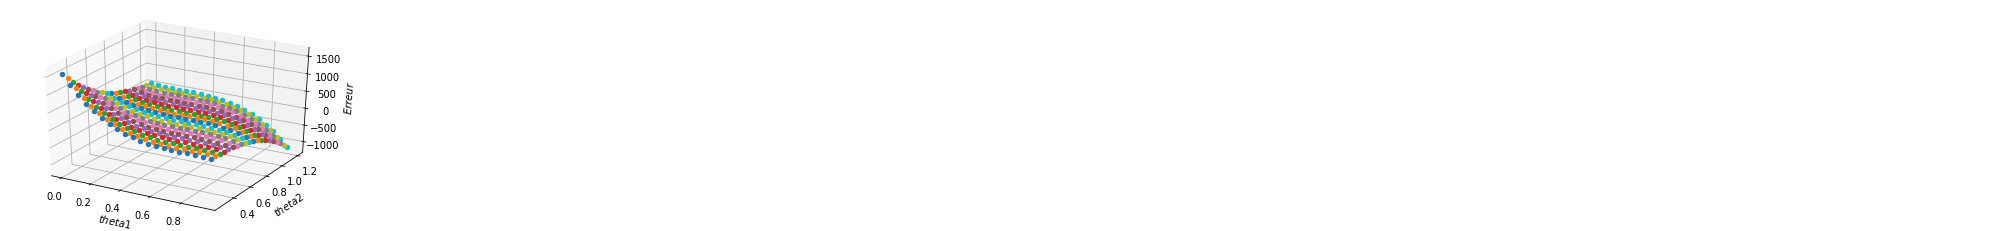

In [67]:
X=np.array([[1.0,2.0],[10.0,8.0],[12.0,6.0],[5.0,4.0]])
Y=np.array([0.75,9.75,9.25,4.25])

#best theta list found: [-1.25,0.5,0.75]

#Error calulation using a third degree polynomial method to show a non-convex solution
Erreur = []
def calcul_erreur2(theta0,theta1,theta2,liste_Y,liste_X):
    erreur=0
    ly=len(liste_Y)
    for i in range(ly):
        y_faux=theta0+theta1*liste_X[i][0]+theta2*liste_X[i][1]
        erreur+=(liste_Y[i]-y_faux)**3 #third degree
    return erreur

#this is exacly the same method as in the minor assignment 2
theta0=-1.25
theta_test1=np.arange(0,1,0.05)
theta_test2=np.arange(0.25,1.25,0.05)
l=len(theta_test1)
Liste_erreurs=[[0 for i in range(l)] for i in range(l)]

for i in range(l):
    for j in range(l):
        Liste_erreurs[i][j]=calcul_erreur2(theta0,theta_test1[i],theta_test2[j],Y,X)

plt.close()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(l):
    for j in range(l):
        ax.scatter(theta_test1[i], theta_test2[j], Liste_erreurs[i][j])
ax.set_xlabel('$theta1$')
ax.set_ylabel('$theta2$')
ax.set_zlabel('$Erreur$');
fig

We can observe that the solutions are not convex

##### Minor Assignment 4/13 

In [397]:
import matplotlib
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random as r

iris=load_iris()
#print(iris.keys())

#separating the train and test parts using a sklearn imported method
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25)

#use of the logistic regression method with multiclass labels
clf_lr = LogisticRegression(solver='lbfgs',multi_class='ovr').fit(X_train, y_train) 

pred=clf_lr.predict(X_test) #prediction
train_score=clf_lr.score(X_train,y_train)
test_score=clf_lr.score(X_test,y_test)

print(train_score,test_score)

dict_keys(['DESCR', 'data', 'target_names', 'target', 'feature_names'])
0.955357142857 0.921052631579


There train score is quite good. In fact, it means that the model doesn't totally stick to the training data so it can generalize. The test score is also satisfying, even though it is lower than the train score. It means that the model is able to predict the race of the flowers in most of the cases.
We could have changed the test size or even operated methods like the K-cross validation method or simply other types of classification methods such as the decision trees method. 

##### Minor Assignment 5/13 

In [400]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn import utils
import numpy as np
bhpd = load_boston() # bhpd stands for Boston house prices dataset

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
boston=pd.DataFrame(bhpd.data)

#We used pandas rather that sklearn because we are more familiar with it
#In order to groupe the data and the target, we had to operate a little modification.
boston_label=pd.DataFrame(bhpd.target)
l=len(boston)
boston['labels']=pd.Series(boston_label[0],[i for i in range(0,l)])

#functions to show the efficiency of transformations 
def gauss(x,i):
    mu=0.05
    s=10000
    mui=mu*i
    return np.exp((x-mui)**2/(2*s**2))

def identity(x,i):
    return x

def polynomial(x,i):
    return x**(i)

def logistic_sig(a):
    return 1/(1+np.exp(-a))

def basic_sig(x,i):
    mu=0.05
    s=5
    mui=mu*i
    return (logistic_sig((x-mui)/s))



def score_k_cross(boston,f): #returns the score of the predictions using k-cross validation and an f transformation
    k=5
    L=[0 for i in range(k)]
    J=[0 for i in range(k)]

    boston=utils.shuffle(boston) 
    for i in range(k):
        L[i]=boston.iloc[i*int(l/k):(i+1)*int(l/k)] #test
        J[i]=boston.drop([j for j in range(i*int(l/k),(i+1)*int(l/k))],axis=0) #train
    
    score_test=0
    score_data=0
    for i in range(k):
        label_train=J[i]['labels']
        data_train=J[i].drop(['labels'],axis=1)
        label_test=L[i]['labels']
        data_test=L[i].drop(['labels'],axis=1)
        for j in range(12):
            data_train[j]=f(data_train[j],j)
            data_test[j]=f(data_test[j],j)
        lr=LinearRegression().fit(data_train,label_train)
        score_test += lr.score(data_test,label_test) 
        score_data += lr.score(data_train,label_train) 
    return (score_data/k,score_test/k)

print(score_k_cross(boston, gauss))
print(score_k_cross(boston, identity))
print(score_k_cross(boston, basic_sig))
print(score_k_cross(boston, polynomial))


(0.7499092147770543, 0.72777062015671867)
(0.74874800274007725, 0.72348414908848324)
(0.73302364282838539, -247009314.90292805)
(0.28540481320717059, 0.28741305551471691)


We can observe that the gauss transformation is the only one that is effecient even though it doesn't seen to bring any improvement to the identity transformation which is actually the method with no transformation.

##### Minor Assignment 6/13 

In [407]:
import csv
import pandas as pd
import sklearn
import random as r
from sklearn import tree
from sklearn import utils

#Goblins File on my computer
goblins=pd.read_csv('file:///Users/Nicolas/Downloads/gobelins.csv')


def score(n,goblins,mln,msl,md): #returns the score for the data and labels uting decision trees
    k = len(goblins)
    limit = int(0.75*k)
    data_score=0
    test_score=0
    for i in range(n):
        goblins=utils.shuffle(goblins,random_state=r.randint(0,100))
        atts  = goblins.drop(['id','type'],axis=1)
        atts = pd.get_dummies(atts) #transforms the colors into new columns with 0 or 1 values
        #creating the label
        labels = goblins['type']
        #cutting the dataset
        data_train = atts.iloc[:limit]
        labels_train = labels.iloc[:limit]
        data_test = atts.iloc[limit:]
        labels_test = labels.iloc[limit:]

        #decision tree method
        clf = tree.DecisionTreeClassifier(max_leaf_nodes=mln,min_samples_leaf=msl,max_depth=md)
        clf = clf.fit(data_train, labels_train)
    
        #predictions
        data_prediction = clf.predict(data_train)
        test_prediction = clf.predict(data_test)
        length_labels_train=len(labels_train)
        length_label_test=len(labels_test)
        data_score += sum(labels_train==data_prediction)/length_labels_train
        test_score += sum(labels_test==test_prediction)/length_label_test
    
    test_score=test_score/n
    data_score=data_score/n
    return(data_score,test_score)

print(score(10,goblins,15,1,4))

(0.8541871921182265, 0.6735294117647059)


In [409]:
max=0
(x,y,z)=(0,0,0)
for i in range(12,18):
    for j in range(1,5):
        for k in range(1,5):
            a,b=(score(10,goblins,i,j,k))
            if b>max:
                max=b
                (x,y,z)=(i,j,k)
print(max,(x,y,z))

0.7132352941176471 (17, 2, 4)


First of all we can see that the score function returns results that are medium. 
Then, we tested different paremeters in order to find the optimal set of max_leaf_nodes, min_samples_leaf a d max_depth. The last execution box returns the best test score and the combination of the 3 parameters values. 

##### Minor Assignment 7/13 

In [337]:
import csv
import pandas as pd
import sklearn
import random as r
from sklearn import tree
from sklearn import utils

goblins=pd.read_csv('file:///Users/Nicolas/Downloads/gobelins.csv')


def score_random_forests(goblins,k,nb_arbres): #returns the score using random forests method
    L=[0 for _ in range(k)]
    J=[0 for _ in range(k)]
    l=len(goblins)
    L_score=[0 for _ in range(k)]
    for i in range(k): #as many times as we cut our dataset into
        #defining the dataset and creating the train and test data
        L[i]=goblins.iloc[i*int(l/k):(i+1)*int(l/k)] #test
        J[i]=goblins.drop([j for j in range(i*int(l/k),(i+1)*int(l/k))],axis=0) #train
        L[i]=L[i].drop(['id'],axis=1)
        J[i]=J[i].drop(['id'],axis=1)
        
        label_train=J[i]['type']
        data_train=J[i].drop(['type'],axis=1)
        label_test=L[i]['type']
        data_test=L[i].drop(['type'],axis=1)
        data_train=pd.get_dummies(data_train)
        data_test=pd.get_dummies(data_test)
        l_test=len(data_test)
        M=[[] for _ in range(l_test)] #list to stock the predictions
        ZZ=['a' for _ in range(l_test)] #list to stock the chosen 
        for j in range(nb_arbres):
            m=int(np.sqrt(l))
            #randomizing the states
            state=r.randint(0,1000)
            data_train=utils.shuffle(data_train,random_state=state)
            label_train=utils.shuffle(label_train,random_state=state)
            
            data_train=data_train.iloc[:m]
            label_train=label_train.iloc[:m]
            
            #decision tree method
            clf = tree.DecisionTreeClassifier()
            clf = clf.fit(data_train, label_train)
        
            prediction_test=clf.predict(data_test)
            for p in range(l_test):
                M[p].append(prediction_test[p])
        for h in range(l_test):  #counting and choosing the race 
            ghost=M[h].count('Ghost')
            goblin=M[h].count('Goblin')
            ghoul=M[h].count('Ghoul')
            if ghost>=goblin and ghost>=ghoul:
                maximum='Ghost'
            elif goblin>=ghost and goblin>=ghoul:
                maximum='Goblin'
            else:
                maximum='Ghoul'
            ZZ[h]=maximum
        score=0
        for g in range(l_test):
            if ZZ[g]==label_test[g+i*int(l/k)]:
                score +=1
        score=score/l_test
        L_score[i]=score
    return (sum(L_score)/k)

X=[20*i for i in range(1,50)]
Y=[0 for i in range(49)]
l=len(X)
for i in range(l):
    Y[i]=score_random_forests(goblins,5,X[i]) #calculating the scores for sereval numbers of trees


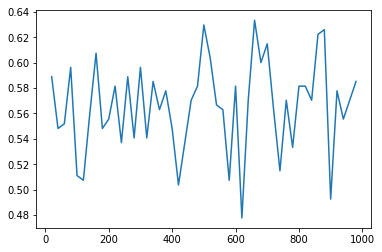

In [338]:
plt.close('all')
plt.plot(X,Y)
plt.show() #plotting the results 

Our model doens't really show anything interesting. If it had worked as planned, we should have had a kind of increasing function (normally, the more trees there are per forest, the better the result). 

##### Minor Assignment 8/13 

In [410]:
from math import *

#assigning values of delta, dvc and epsilon
delta = 0.1
VC_dimension = 4
epsilon = 0.5
m = 0

while m < (8/epsilon**2)*log(4*(((2*m)**VC_dimension)+1)/delta):
    m += 100

print(m)


1200


We can observe that the generalization error factor (epsilon) had the biggest impact on the number of trainings required to ensure a specific generalization error. We can also observe that VC dimension has a medium impact and delta a weak impact.
The results were found by modifiying the values of delta, VC_dimension and epsilon. (we did not code an automatic algorithm that calculated the impacts of each parameter.

##### Minor Assignment 9/13 

In [414]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import utils
import random as r

boston=pd.DataFrame(bhpd.data)
boston_label=pd.DataFrame(bhpd.target)
l=len(boston)

a = int(0.80*l)
n=200
lr_train_score = [0 for _ in range(n)]
ridge_train_score = [0 for _ in range(n)]
lasso_train_score = [0 for _ in range(n)]
lr_test_score = [0 for _ in range(n)]
ridge_test_score = [0 for _ in range(n)]
lasso_test_score = [0 for _ in range(n)]
alpha = [0.05,0.1,1,5]
length_alpha=len(alpha)
for j in range(length_alpha) :
    for i in range (n):
        rand = r.randint(0,1000)
        boston = utils.shuffle(boston, random_state = rand)
        boston_label = utils.shuffle(boston_label, random_state = rand)
        
        data_train = boston.iloc[:a]
        data_test = boston.iloc[a:]
        
        labels_train = boston_label.iloc[:a]
        labels_test = boston_label.iloc[a:]

        lr = LinearRegression().fit(data_train,labels_train)
        ridge = Ridge(alpha=alpha[j]).fit(data_train,labels_train)
        lasso = Lasso(alpha=alpha[j]).fit(data_train,labels_train)

        lr_train_score[i]=(lr.score(data_train,labels_train))
        lr_test_score[i]=(lr.score(data_test,labels_test))
        ridge_train_score[i]=(ridge.score(data_train,labels_train))
        ridge_test_score[i]=(ridge.score(data_test,labels_test))
        lasso_train_score[i]=(lasso.score(data_train,labels_train))
        lasso_test_score[i]=(lasso.score(data_test,labels_test))

    #defining length once for all to reduce complexity
    length_lr_train_score=len(lr_train_score)
    length_ridge_train_score=len(ridge_train_score)
    length_lasso_train_score=len(lasso_train_score)
    length_lr_test_score=len(lr_test_score)
    length_ridge_test_score=len(ridge_test_score)
    length_lasso_test_score=len(lasso_test_score)
    
    lr_train_score_average = sum(lr_train_score)/length_lr_train_score
    ridge_train_score_average = sum(ridge_train_score)/length_ridge_train_score
    lasso_train_score_average = sum(lasso_train_score)/length_lasso_train_score
    lr_test_score_average = sum(lr_test_score)/length_lr_test_score
    ridge_test_score_average = sum(ridge_test_score)/length_ridge_test_score
    lasso_test_score_average = sum(lasso_test_score)/length_lasso_test_score

    print(lr_train_score_average)
    print(ridge_train_score_average)
    print(lasso_train_score_average)
    print(lr_test_score_average)
    print(ridge_test_score_average)
    print(lasso_test_score_average)
    print(" ")

0.742669449964
0.742651820848
0.732386901742
0.71366723128
0.713687034299
0.702883053963
 
0.742528461453
0.742461922903
0.72888058859
0.713609762304
0.71367487145
0.70051011482
 
0.744437163184
0.742129520992
0.68553816165
0.708218194548
0.705920354948
0.65296120084
 
0.74265454722
0.73482660171
0.562945924315
0.713640798172
0.708368835066
0.55073866758
 


We obsere that the ridge method and the logistic method are slightly better that the other ones.
But as the values are nearly always around 0.74 and that the difference between the test and the train score are very small, we can say that the learning is acceptable or even satisfying.

##### Minor assignment 10/13

Not done

##### Minor assignment 11/13

In [415]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.decomposition import PCA

pulsar = pd.read_csv('file:///Users/Nicolas/Downloads/HTRU_2-10.09.27.csv')
pulsar_columns = list(pulsar.columns)
pulsar.columns = ['Mean of the integrated profile', 'Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', 'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve', 'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve', 'class']
pulsar.loc[len(pulsar)] = pulsar_columns
pulsar.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,class
0,102.508,58.8824,0.465318,-0.515088,1.67726,14.8601,10.5765,127.394,0
1,103.016,39.3416,0.323328,1.05116,3.12124,21.7447,7.73582,63.1719,0
2,136.75,57.1784,-0.0684146,-0.636238,3.64298,20.9593,6.8965,53.5937,0
3,88.7266,40.6722,0.600866,1.12349,1.17893,11.4687,14.2696,252.567,0
4,93.5703,46.6981,0.531905,0.416721,1.63629,14.5451,10.6217,131.394,0


##### Minor assignment 12/13

not done

##### Minor assignment 13/13

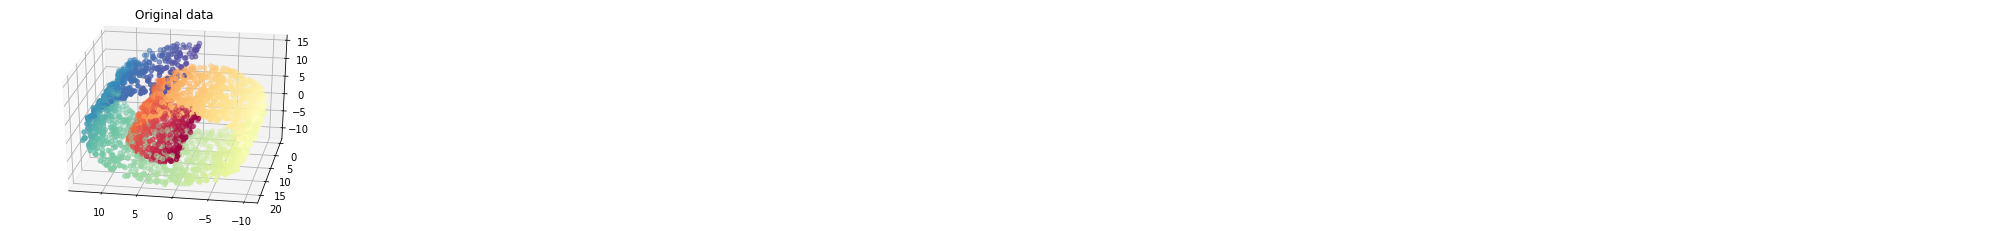

In [420]:
plt.close()
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding, Isomap, SpectralEmbedding, MDS, TSNE

X, color = make_swiss_roll(n_samples=3000, noise=0.2)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original data")
ax.view_init(30,100)
plt.show()

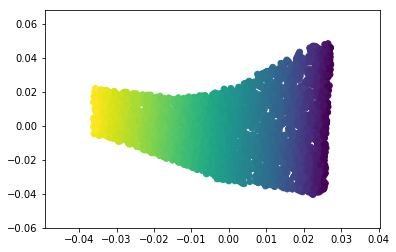

In [423]:
plt.close()
LLE = LocallyLinearEmbedding(n_neighbors=15, n_components=2) #using locallyLinearEmbedding method
X_LLE = LLE.fit_transform(X)
plt.scatter(X_LLE[:, 0], X_LLE[:, 1], c=color);
plt.show()

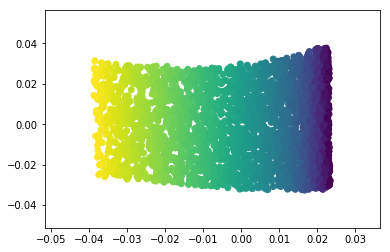

In [424]:
plt.close()
mLLE = LocallyLinearEmbedding(n_neighbors=15, n_components=2, method='modified') #modified method
X_mLLE = mLLE.fit_transform(X)
plt.scatter(X_mLLE[:, 0], X_mLLE[:, 1], c=color);
plt.show()

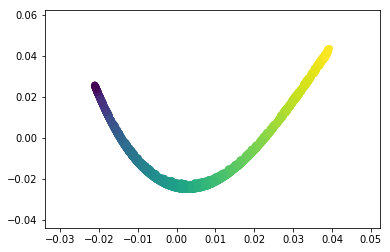

In [425]:
plt.close()
LLE_HE = LocallyLinearEmbedding(n_neighbors=15, n_components=2, method='hessian') #using hessian method
X_LLE_HE = LLE_HE.fit_transform(X)
plt.scatter(X_LLE_HE[:, 0], X_LLE_HE[:, 1], c=color);
plt.show()

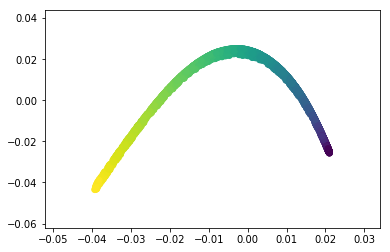

In [430]:
plt.close()
LLE_LTSA = LocallyLinearEmbedding(n_neighbors=15, n_components=2, method='ltsa')
X_LLE_LTSA = LLE_LTSA.fit_transform(X)
plt.scatter(X_LLE_LTSA[:, 0], X_LLE_LTSA[:, 1], c=color);
plt.show()

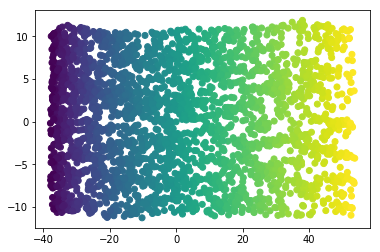

In [426]:
plt.close()
ISO = Isomap(n_neighbors=15, n_components=2)
X_ISO = ISO.fit_transform(X)
plt.scatter(X_ISO[:, 0], X_ISO[:, 1], c=color);
plt.show()

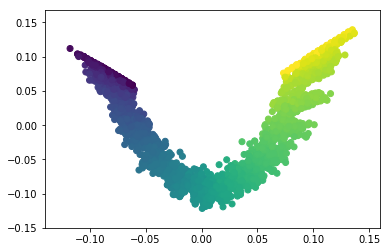

In [427]:
plt.close()
SPE = SpectralEmbedding(n_neighbors=15, n_components=2)
X_SPE = SPE.fit_transform(X)
plt.scatter(X_SPE[:, 0], X_SPE[:, 1], c=color);
plt.show()